In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from ipywidgets import interact
import pandas as pd
import seaborn as sns
from scipy.signal import lfilter


In [22]:
data_old = np.load('train.npy')
data_old.shape


(8, 8, 12220)

In [23]:
data_new = np.load("train_new.npy")
data_new.shape

(8, 8, 12220)

In [24]:
data_old

array([[[-1.02547480e+00, -1.01867676e+00, -9.90642342e-01, ...,
         -1.01562353e+00, -1.02817619e+00, -1.00278518e+00],
        [-9.74673983e-01, -9.78321573e-01, -9.74234960e-01, ...,
         -2.69007628e-04,  6.28844964e-03,  2.95045098e-03],
        [-1.00550931e+00, -1.00269290e+00, -1.00568616e+00, ...,
          5.21056761e-03,  9.76609461e-03, -1.70789148e-01],
        ...,
        [-9.75588495e-01, -9.87673201e-01, -1.30220510e+00, ...,
         -8.00990304e-03,  3.12433990e-03, -6.57816654e-03],
        [-9.90781576e-01, -9.95390259e-01, -9.86025337e-01, ...,
         -2.49284512e-02, -4.01528804e-02,  9.84914992e-03],
        [-1.00214040e+00, -1.00397939e+00, -9.70682312e-01, ...,
         -1.00560045e+00, -9.99962962e-01, -1.00177486e+00]],

       [[-9.96746562e-01, -9.95900236e-01, -9.98031970e-01, ...,
         -9.81180301e-01, -9.99825985e-01, -9.78941131e-01],
        [-1.01360381e+00, -1.01649598e+00, -9.65679727e-01, ...,
          6.03457005e-02, -3.91607103e

In [71]:
block = 0
res = np.zeros((8, 8, 47))
for row in range(8):
    
    for col in range(8):

        block = np.clip(data_old[row,col,:], -1, 1)
        for n in range(47):
            res[row,col,n] = np.rint(np.mean(block[260*n:260*n+259]))



def conf_matrix(data):

    def plot_frame(frame):
        fig, ax = plt.subplots()
        im = ax.imshow(data[:, :, frame], cmap='viridis', interpolation='nearest', extent=[0.5, 8.5, 8.5, 0.5])
        plt.title(f"Frame {frame + 1}")
        plt.colorbar(im)
        
        for i in range(8):
            for j in range(8):
                value = data[i, j, frame]
                plt.text(j + 1, i + 1, f'{value:.2f}', color='white', ha='center', va='center', fontsize=8)

        plt.xticks(range(1, 9))
        plt.yticks(range(1, 9))
        plt.show()

    # Create an interactive scroller
    interact(plot_frame, frame=(0, data.shape[2] - 1, 1))



In [72]:
conf_matrix(res)

interactive(children=(IntSlider(value=23, description='frame', max=46), Output()), _dom_classes=('widget-inter…

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def confusion_matrix(data):

    def plot_frame(frame):
        fig, ax = plt.subplots()
        im = ax.imshow(data_old[:, :, frame], cmap='viridis', interpolation='nearest', extent=[0.5, 8.5, 8.5, 0.5])
        plt.title(f"Frame {frame + 1}")
        plt.colorbar(im)
        
        for i in range(8):
            for j in range(8):
                value = data_old[i, j, frame]
                plt.text(j + 1, i + 1, f'{value:.2f}', color='white', ha='center', va='center', fontsize=8)

        plt.xticks(range(1, 9))
        plt.yticks(range(1, 9))
        plt.show()

    # Create an interactive scroller
    interact(plot_frame, frame=(0, data_old.shape[2] - 1, 1))


In [9]:
confusion_matrix(data_old)

interactive(children=(IntSlider(value=6109, description='frame', max=12219), Output()), _dom_classes=('widget-…

#### Time series
Following code function takes the square index as parameter and plots the value over time for this square

In [84]:
def plot_time_series(spatial_index, data):
    time_series = data[spatial_index[0], spatial_index[1], :]
    
    plt.plot(range(1, data.shape[2] + 1), time_series, label=f'Spatial Index {spatial_index}', linewidth=0.5)
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.title(f'Time Series for Spatial Index {spatial_index}')
    plt.legend()
    plt.show()

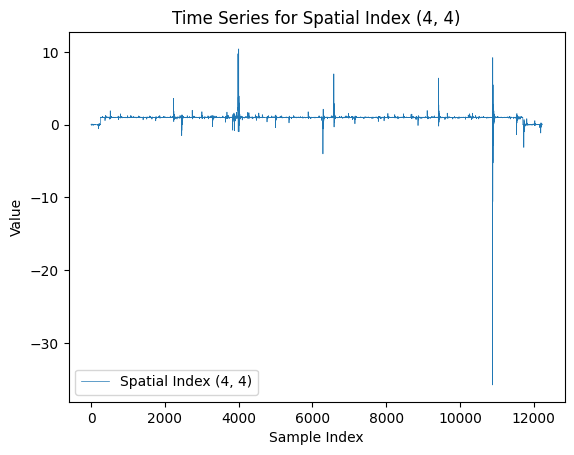

In [85]:
plot_time_series((4, 4), data_old)

#### "outlier removement"
now I replaced Nan for values which are larger than 1 or smaller then -1

In [88]:
data_without_oultier = data_old.copy()
mask = (data_without_oultier >= 1) | (data_without_oultier <= -1)

data_without_oultier[mask] = np.nan

watch out, if you choose (5,4) here, first of all of python starts with 0, second in the confusion matrix first index is Y-axis, second is X-axis

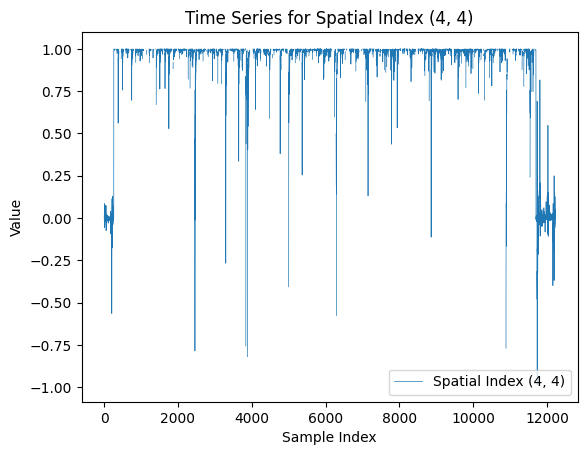

In [89]:

plot_time_series((4, 4), data_without_oultier)

#### time series plots for each grid of the chess board

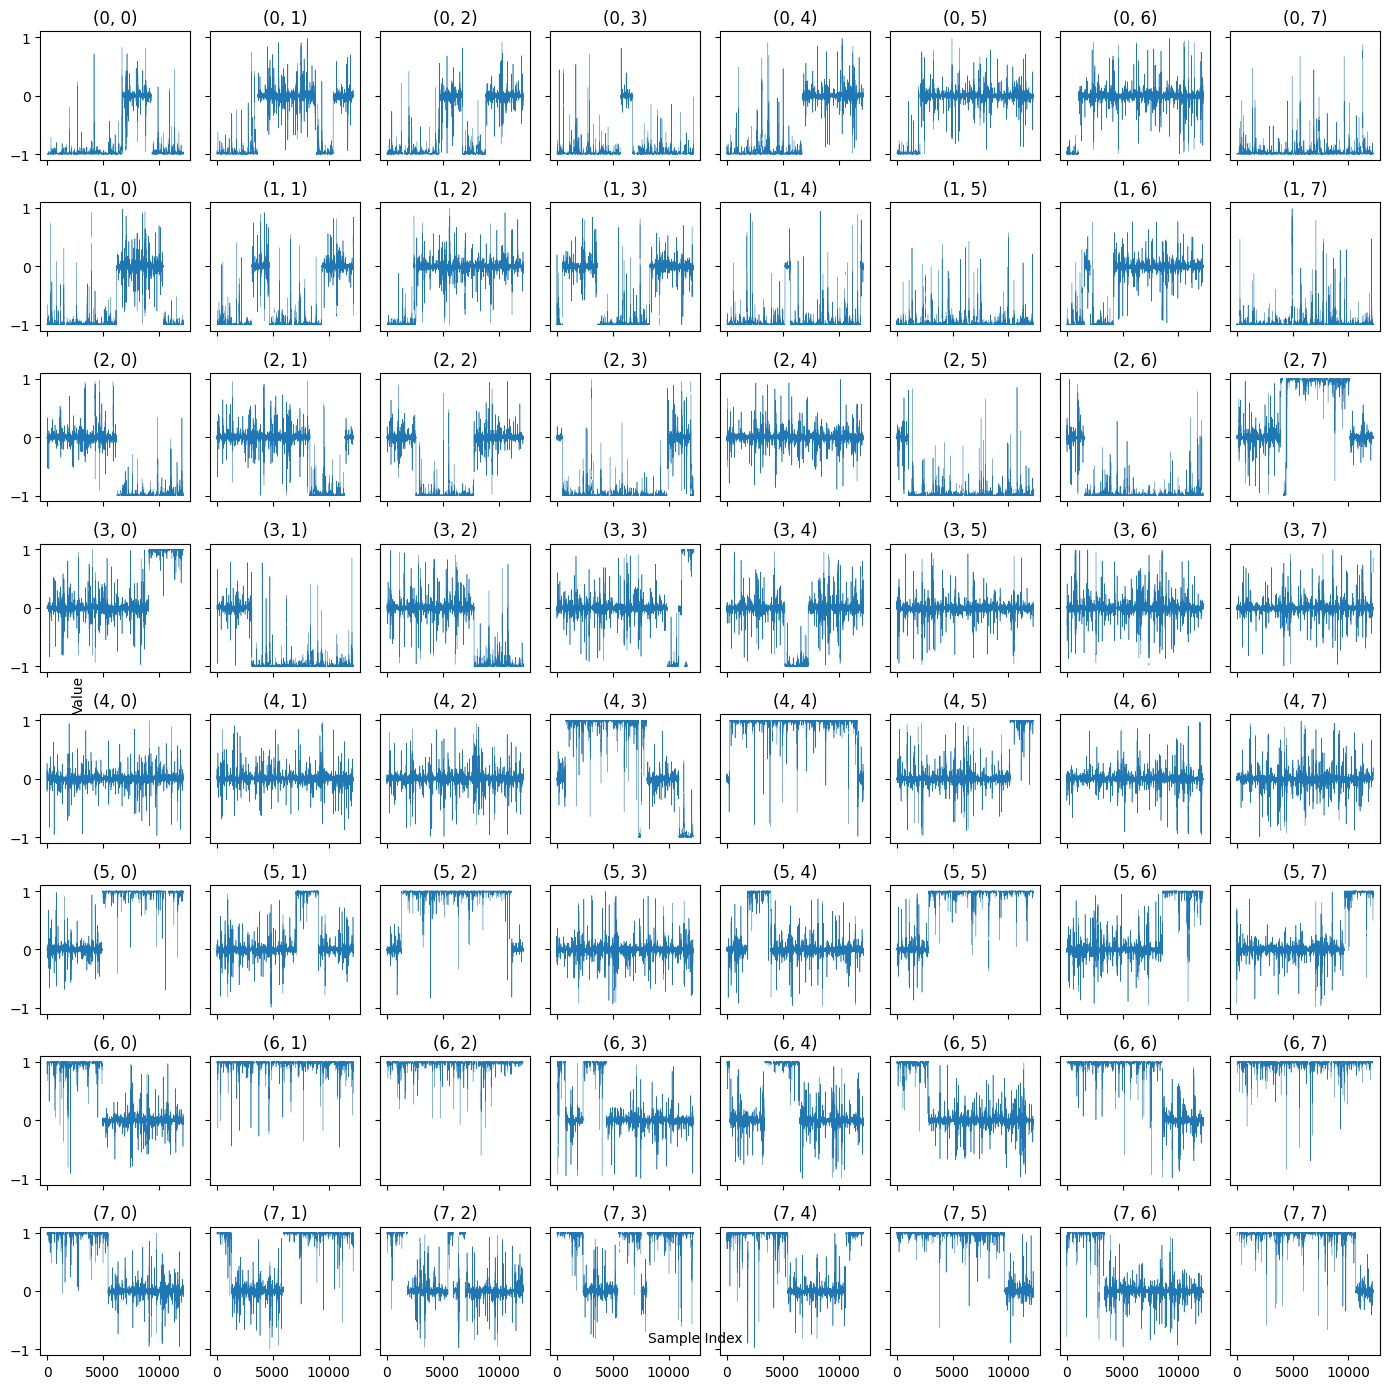

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming your 8x8x12220 numpy array is named 'data'
# You can replace this line with your actual data
data = data_without_oultier.copy()

# Calculate the number of rows and columns for the subplot grid
num_rows = data.shape[0]
num_cols = data.shape[1]

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 14), sharex=True, sharey=True, linewidth=0.005)

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

# Loop through each data point and plot the time series
for i in range(num_rows):
    for j in range(num_cols):
        # Extract the time series for the current data point
        time_series = data[i, j, :]
        
        # Plot the time series
        axes[i * num_cols + j].plot(range(1, data.shape[2] + 1), time_series, linewidth = 0.4)
        
        # Set titles for better readability
        axes[i * num_cols + j].set_title(f'({i}, {j})')

# Set common labels
fig.text(0.5, 0.04, 'Sample Index', ha='center', va='center')
fig.text(0.06, 0.5, 'Value', ha='center', va='center', rotation='vertical')

plt.tight_layout()
plt.show()
